# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [117]:
'''
-The data reveals a positive correlation between mouse weight and average tumor volume, 
indicating that heavier mice tend to have larger tumors during treatment with Capomulin.
-The correlation coefficient of approximately 0.84 suggests a moderately strong relationship, 
though mouse weight alone does not fully account for the variability in tumor size. 
-Additionally, the linear regression line shows a clear upward trend, reinforcing the observation 
that as mouse weight increases, so does the tumor volume in mice treated with Capomulin.
'''


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the merged dataframe
#print(merged_df)

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [118]:
# Checking the number of mice.
mouse_id_count = mouse_metadata['Mouse ID'].count()
mouse_id_count

249

In [122]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

import numpy as np
# Identify the duplicate rows based on both 'Mouse ID' and 'Timepoint'
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Convert to a numpy array (optional, depending on your requirement)
duplicate_mouse_ids_array = np.array(duplicate_mouse_ids)

# Display the result
duplicate_mouse_ids_array

array(['g989'], dtype=object)

In [123]:
# Optional: Get all the data for the duplicate mouse ID.
#duplicate_mice = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
#duplicate_mice
# Identify the duplicate rows based on both 'Mouse ID' and 'Timepoint'
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the unique Mouse IDs from the duplicate entries
#duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()


# Get all data for the duplicate Mouse IDs
#duplicate_mouse_data = study_results[study_results['Mouse ID'].isin(duplicate_mouse_ids)]
#duplicate_mouse_data = mouse_metadata[mouse_metadata['Mouse ID'].isin(duplicate_mouse_ids)][['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
duplicate_mouse_data = duplicate_mice[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

# Display the result
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Extract the unique Mouse IDs of the duplicates
unique_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Create a clean DataFrame by excluding the rows for the duplicate Mouse IDs
clean_df = study_results[~study_results['Mouse ID'].isin(unique_mouse_ids)] #the ~ means negation

# Merge with 'mouse_metadata' to include 'Drug Regimen', 'Sex', 'Age_months', and 'Weight (g)'
clean_df = pd.merge(clean_df, mouse_metadata[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']], on="Mouse ID")
# Display the clean DataFrame
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df['Mouse ID'].nunique() #counts unique values in column
clean_df_count

248

## Summary Statistics

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()

summary_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'variance': 'Tumor Volume Variance',
    'std_dev': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std Err',
})

summary_stats



,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [126]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()

summary_stats

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

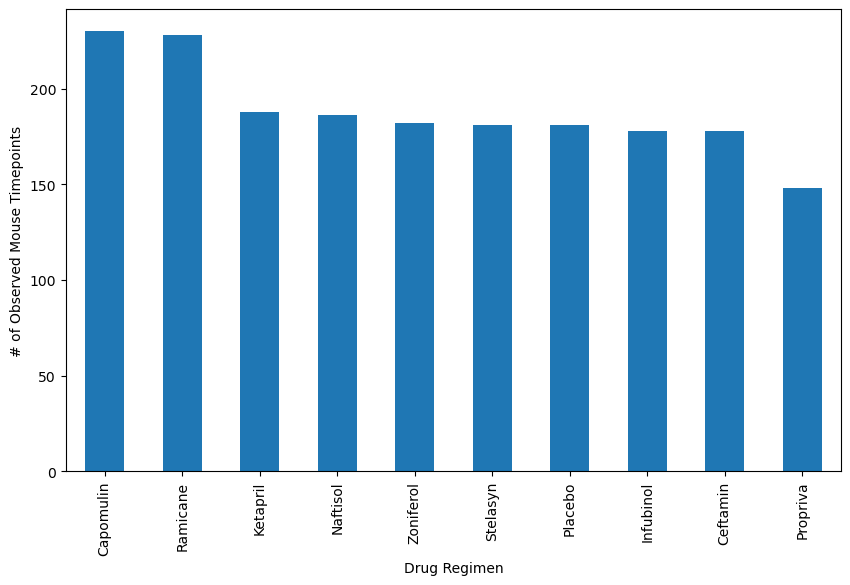

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts() #Uses the drug regimen column x-axis
regimen_counts.plot(kind='bar', figsize=(10,6)) #plot function of bar and figure size

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

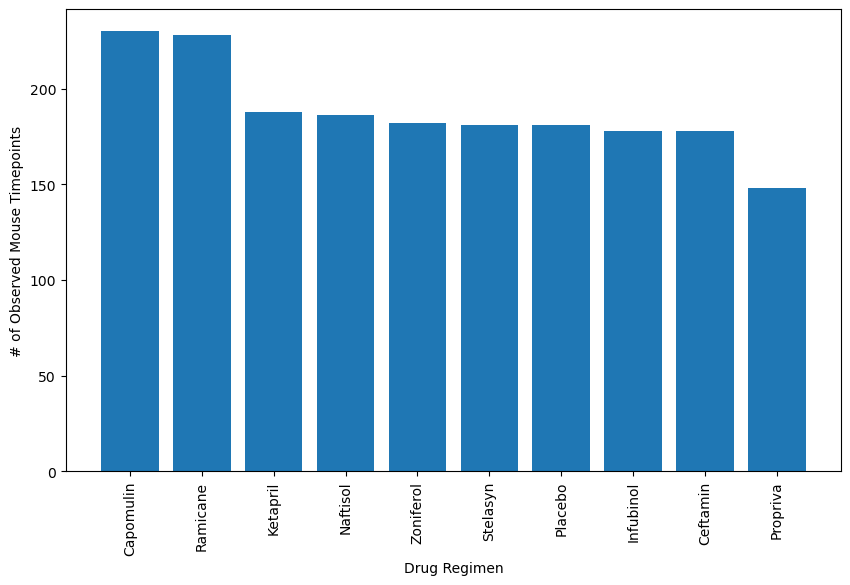

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.show()


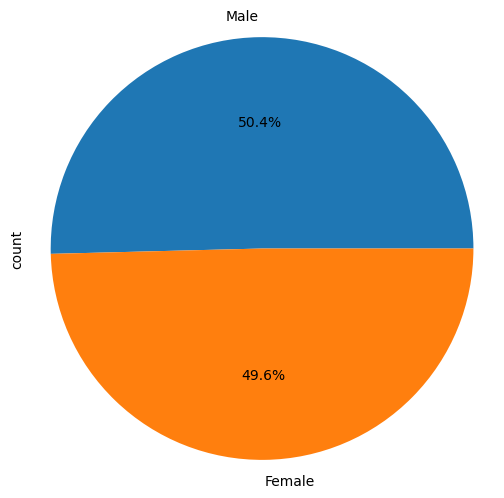

In [93]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()

# Make the pie chart
# Count the number of female and male mice
gender_counts = unique_mice['Sex'].value_counts()

#Conditions for pie chart
gender_counts.plot(kind='pie', autopct= '%1.1f%%', figsize=(6,6), startangle=0, labels=gender_counts.index)

plt.axis('equal')

plt.show()

In [88]:
print(clean_df.columns)

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


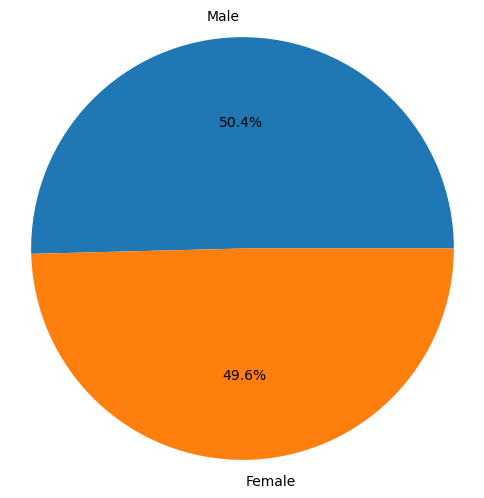

In [95]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct= '%1.1f%%', startangle=0)

plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Filter the clean_df for the selected treatment regimens
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, filtered_df, on=['Mouse ID', 'Timepoint'], how = 'left')

merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol = []

for treatment in treatment:
    filtered_data = clean_df.loc[clean_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    #tumor_vol.append(filtered_data.values) #append the tumor volume data
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = filtered_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    

    # add subset


    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq - (1.5 * iqr)

    outliers = filtered_data[(filtered_data < lower_bound) | (filtered_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
'''
iqr_info[treatment] = {
    'lowerq': lowerq,
    'upperq': upperq,
    'iqr': iqr,
    'lower_bound': lower_bound,
    'upper_bound': upper_bound,
    'outliers': outliers
}
'''
# Output the IQR information for this regimen
    #print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 0       45.000000
224     45.000000
225     45.000000
226     45.000000
227     45.000000
          ...    
1837    37.311846
1841    40.728578
1846    38.125164
1865    47.685963
1875    41.581521
Name: Tumor Volume (mm3), Length: 202, dtype: float64
Ramicane's potential outliers: 58      45.000000
59      45.000000
60      45.000000
61      45.000000
62      45.000000
          ...    
1844    38.810366
1854    40.667713
1861    37.225650
1866    32.978522
1872    33.562402
Name: Tumor Volume (mm3), Length: 216, dtype: float64
Infubinol's potential outliers: 29      45.000000
30      45.000000
31      45.000000
32      45.000000
33      45.000000
          ...    
1776    66.196912
1781    66.083066
1789    62.435404
1791    67.973419
1793    60.918767
Name: Tumor Volume (mm3), Length: 177, dtype: float64
Ceftamin's potential outliers: 168     45.000000
169     45.000000
170     45.000000
171     45.000000
172     45.000000
          ...    
1845    68

"\niqr_info[treatment] = {\n    'lowerq': lowerq,\n    'upperq': upperq,\n    'iqr': iqr,\n    'lower_bound': lower_bound,\n    'upper_bound': upper_bound,\n    'outliers': outliers\n}\n"

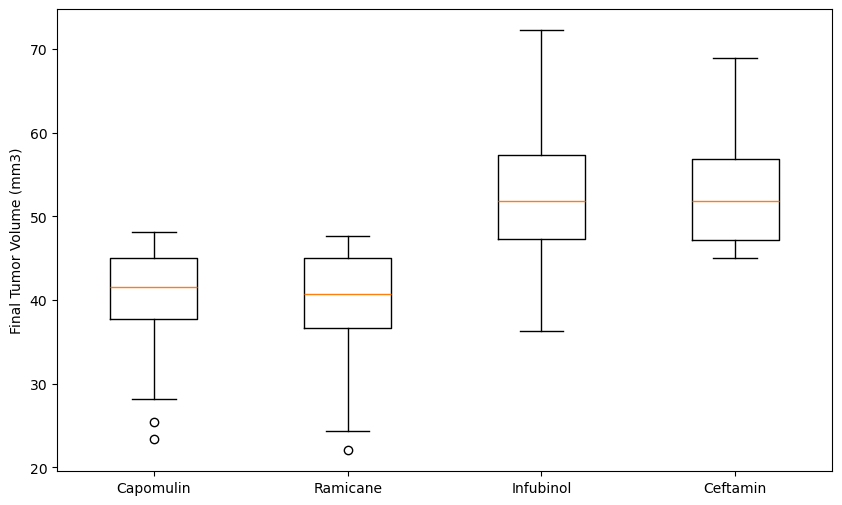

In [110]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment)]

plt.figure(figsize=(10,6))
plt.boxplot([filtered_df[filtered_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatment],
            labels=treatment)

# Add title and labels
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

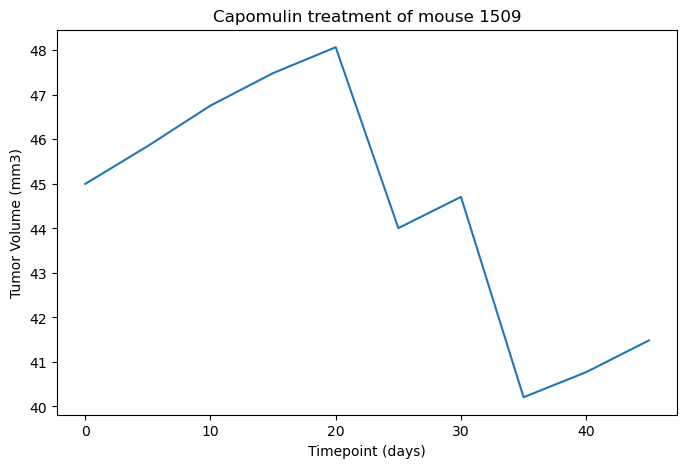

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse (for example, let's use Mouse ID 'l509')
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Generate the line plot
plt.figure(figsize=(8,5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Add title and labels
plt.title('Capomulin treatment of mouse 1509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

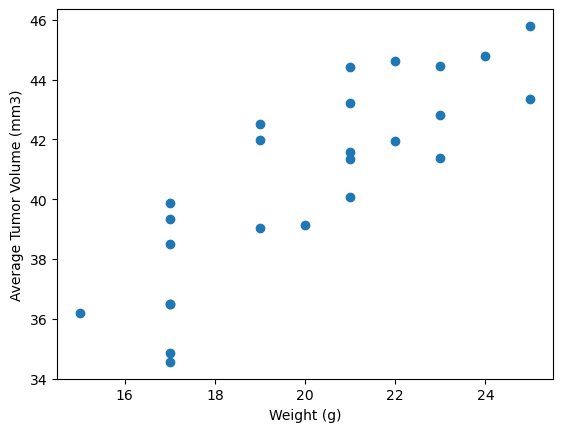

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


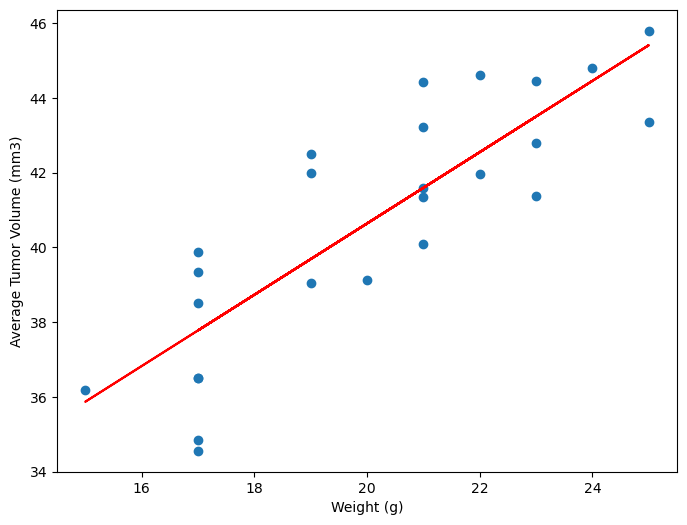

In [127]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np

# Filter the data for mice treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume back with the mouse weight data
merged_data = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Calculate the correlation coefficient
correlation = np.corrcoef(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0, 1]

# Print the correlation formatted to two decimal places
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")







from scipy.stats import linregress

# Filter the data for mice treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume back with the mouse weight data
merged_data = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Generate points for the regression line
regress_values = merged_data['Weight (g)'] * slope + intercept

# Generate the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], label='Data points')

# Plot the linear regression line
plt.plot(merged_data['Weight (g)'], regress_values, color='red', label='Regression line')

# Add title and labels

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.legend()

# Show the plot
plt.show()
